In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from __future__ import division, print_function

In [2]:
# create a table structure
df = pd.read_csv('ex1data1.csv', header=None)
df.rename(columns={0: 'population', 1:'profit'},inplace=True)
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


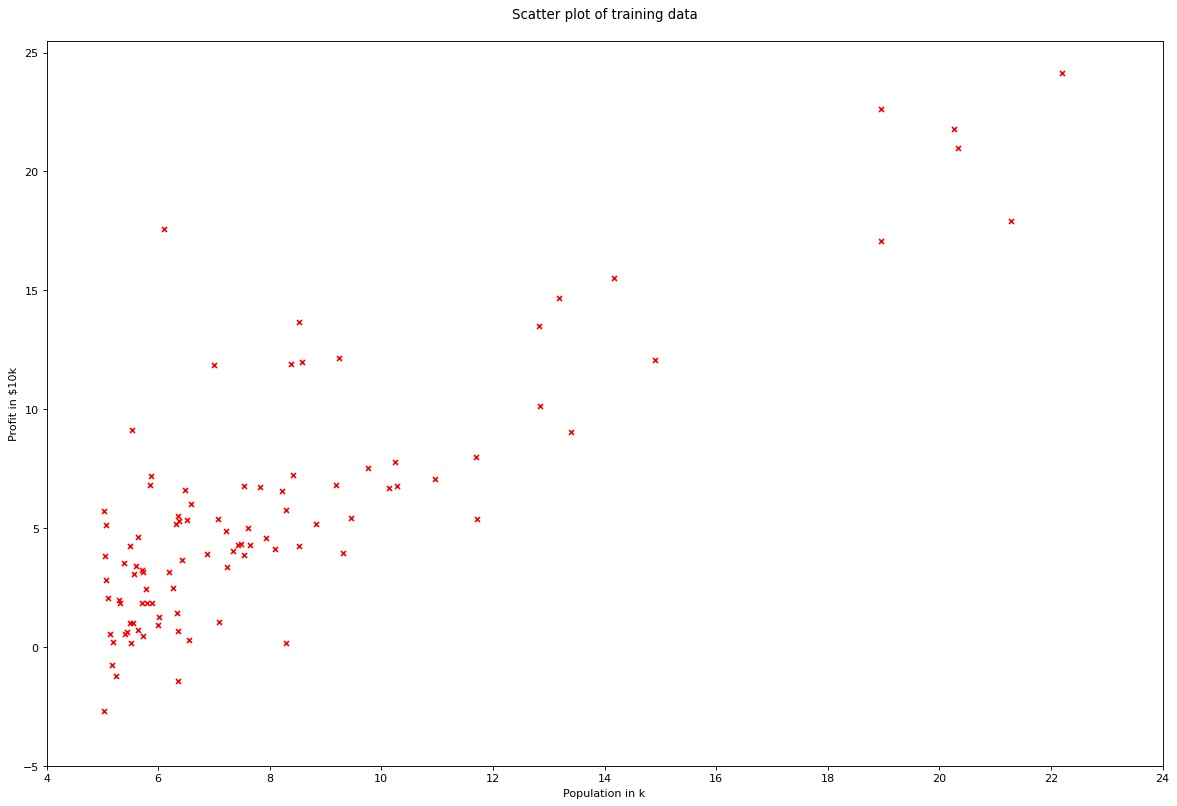

In [4]:
# visualize the data
fig = plt.figure(num=None, figsize=(18,12),dpi=80, facecolor='w')
plt.scatter(df['population'], df['profit'], marker='x', color='red', s=20)
plt.xlim([4,24])
plt.xticks(range(4,26,2))
plt.yticks(range(-5, 30, 5))
plt.xlabel('Population in k')
plt.ylabel('Profit in $10k')
plt.title('Scatter plot of training data\n')
plt.show()

In [11]:
class LinearRegression(object):
    """Performs Linear Regression using Batch Gradient Descent"""
    def __init__(self, X, y, alpha=0.01, n_iterations=5000):
        """INitialize variables.
        
        Parameters:
        ----------
        y : numpy array-like, output / dependent variable
        X: numpy array-like, input / independent variables
        alpha: float or int - learning rate
        n_iterations: # of max iterations to perform gradient descent
        """
        self.y = y
        self.X = self._hstack_one(X)
        self.thetas = np.zeros((self.X.shape[1], 1))
        self.n_rows = self.X.shape[0]
        self.alpha = alpha
        self.n_iterations = n_iterations
        print('Cost before fitting: {0:.2f}'.format(self.cost()))
    
    @staticmethod
    def _hstack_one(input_matrix):
        """Horizontally stack a column of ones for the coeffiicents of the bias terms
        
        Parameters:
        ----------
        input_matrix: numpy array-like (N*M); where N = number of examples; M = # of feeatures
        
        Returns
        --------
        numpy array with stacked column of ones (N*M +1)
        
        """
        return np.hstack((np.ones((input_matrix.shape[0],1)),input_matrix))
    
    def cost(self,):
        """Calculates the cost of current configuration"""
        return (1/ (2* self.n_rows)) * np.sum((self.X.dot(self.thetas) - self.y)**2)
    
    def predict(self, new_X):
        """ Predict values using current config
        
        Parameters:
        ----------
        new_X: numpy array-like
        """
        new_X = self._hstack_one(new_X)
        return new_X.dot(self.thetas)
    
    def batch_gradient(self, ):
        h = self.X.dot(self.thetas) - self.y
        h = np.multiply(self.X, h)
        h = np.sum(h, axis=0)
        return h.reshape(-1,1)

    def batch_gradient_descent(self, ):
        alpha_by_m = self.alpha / self.n_rows
        for i in range(self.n_iterations):
            self.thetas = self.thetas - (alpha_by_m * self.batch_gradient())
            cost = self.cost()
            print('Iteration: {0} Loss: {1:.5f}\r'.format(i+1, cost), end="")

In [12]:
X = df['population'].values.reshape(-1,1)
y = df['profit'].values.reshape(-1,1)
lr = LinearRegression(X,y)
lr.batch_gradient_descent()

Cost before fitting: 32.07


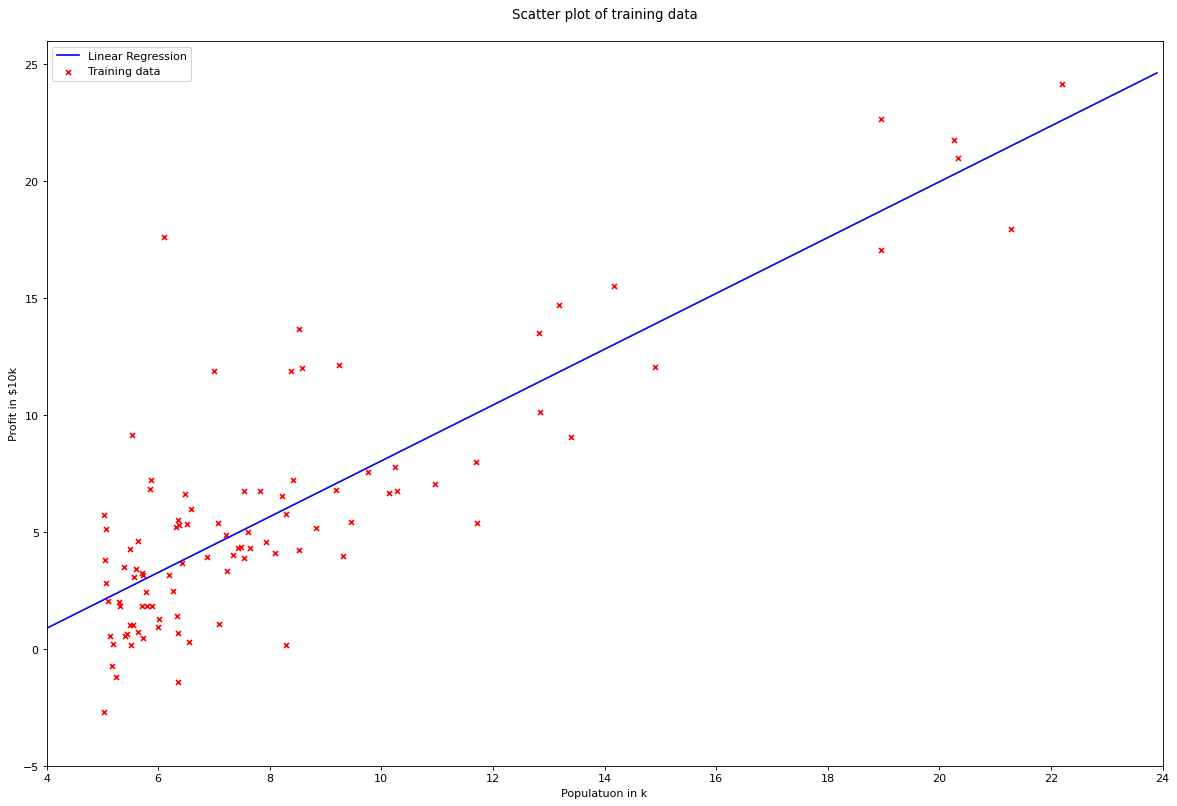

In [14]:
# plot regression line
X = np.arange(4,24,0.1).reshape(-1,1)
fig = plt.figure(num=None, figsize=(18,12), dpi=80, facecolor='w')
plt.scatter(df['population'], df['profit'], marker='x', color='red', s=20, label='Training data')
plt.plot(X, lr.predict(X), color='blue', label='Linear Regression')
plt.xlim([4,24])
plt.xticks(range(4,26,2))
plt.yticks(range(-5,30,5))
plt.xlabel('Populatuon in k')
plt.ylabel('Profit in $10k')
plt.title('Scatter plot of training data\n')
plt.legend()
plt.show()

## Linear Regression with multiple variables

In [16]:
df2 = pd.read_csv('ex1data2.csv')
df2.head()

,2104,3,399900
0,1600,3,329900
1,2400,3,369000
2,1416,2,232000
3,3000,4,539900
4,1985,4,299900


In [18]:
X = df2.iloc[:,[0,1]].values
y = df2.iloc[:,[2]].values

In [19]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
scaler_y = StandardScaler()
X = scaler_x.fit_transform(X)
y = scaler_y.fit_transform(y)

In [20]:
lr = LinearRegression(X, y, alpha=0.1, n_iterations=1000)
lr.batch_gradient_descent()

Cost before fitting: 0.50


In [22]:
X_test = np.array([2104,3]).reshape(1,2)
print('Testing on : {0}'.format(X_test[0]))
X_test = scaler_x.transform(X_test)
prediction = lr.predict(X_test)
print("Prediction [scaled]: {0:.2f}".format(prediction[0][0]))
print('Prediction [unscaled]: {0:.2f}'.format(scaler_y.inverse_transform(prediction)[0][0]))

Testing on : [2104    3]
Prediction [scaled]: 0.13
Prediction [unscaled]: 355190.97
